## Poly Regression-Overfiting-Underfiting-Cross Validation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = np.array([[2, 3, 4]]) 
print(data)

[[2 3 4]]


In [4]:
trans = PolynomialFeatures(degree = 2, include_bias =False)

In [5]:
trans.fit(data) # 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2

PolynomialFeatures(include_bias=False)

In [6]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [7]:
trans.fit_transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [8]:
df = pd.read_csv("Advertising.csv")

In [9]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
X = df.drop("sales", axis =1)
y = df.sales

In [11]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)

In [12]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [13]:
poly_features = polynomial_converter.transform(X)

In [14]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [15]:
poly_features.shape

(200, 9)

In [16]:
pd.DataFrame(poly_features, columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [17]:
X.shape

(200, 3)

In [18]:
pd.DataFrame(poly_features[0], index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["New_features"])

,New_features
TV,230.10
radio,37.80
newspaper,69.20
TV^2,52946.01
TV&Radio,8697.78
TV&Newspaper,15922.92
Radio^2,1428.84
Radio&newspaper,2615.76
Newspaper^2,4788.64


## Train | Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)

### Model for fitting on Polynomial Data

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_poly = LinearRegression(fit_intercept=True)

In [23]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model_poly.predict(X_test)

In [25]:
my_dict = {"Actual": y_test, "pred": y_pred}
compare = pd.DataFrame(my_dict)
compare.sample(20)

,Actual,pred
158,7.3,7.433479
112,14.1,14.099354
102,14.8,14.236222
42,20.7,20.426301
74,17.0,17.500927
80,11.8,11.382250
61,24.2,24.586893
196,9.7,9.665704
15,22.4,22.718393
34,9.5,9.281496


In [26]:
compare.head(20)

,Actual,pred
37,14.7,13.948562
109,19.8,19.334803
31,11.9,12.319282
89,16.7,16.762863
66,9.5,7.902109
119,6.6,6.941438
54,20.2,20.133727
74,17.0,17.500927
145,10.3,10.568890
142,20.1,20.125518


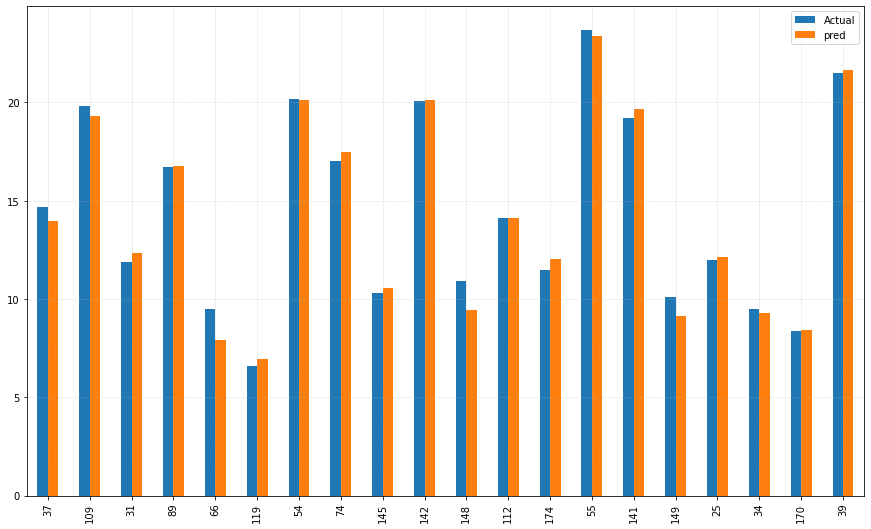

In [27]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5')
plt.show();

In [28]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [29]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

In [30]:
df_coef

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
Radio^2,0.000033
Radio&newspaper,0.000146
Newspaper^2,-0.000030


In [31]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [32]:
df_features = pd.DataFrame(poly_features[0], index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["features_value"])

In [33]:
df_features

,features_value
TV,230.10
radio,37.80
newspaper,69.20
TV^2,52946.01
TV&Radio,8697.78
TV&Newspaper,15922.92
Radio^2,1428.84
Radio&newspaper,2615.76
Newspaper^2,4788.64


In [34]:
y_0 = df_coef.coef * df_features.features_value
y_0

TV                 11.898375
radio               0.494609
newspaper           0.830401
TV^2               -5.871314
TV&Radio            9.933967
TV&Newspaper       -0.834520
Radio^2             0.047855
Radio&newspaper     0.382896
Newspaper^2        -0.145917
dtype: float64

In [35]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

array([21.86190699])

In [36]:
y_0.sum() + model_poly.intercept_

21.86190699314033

In [37]:
11.898375 + -5.871314 + 9.933967 + model_poly.intercept_

21.086585423132743

## Let's compare results of linear and poly regression

In [38]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
model_linear = LinearRegression(fit_intercept=True)

In [40]:
model_linear.fit(X_train2, y_train2)

LinearRegression()

In [41]:
model_linear.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [42]:
coef = pd.DataFrame(model_linear.coef_, index = X.columns, columns = ["coef"])
coef

,coef
TV,0.044696
radio,0.187566
newspaper,-0.000323


In [43]:
feature = pd.DataFrame(X.loc[0].values, index = X.columns, columns = ["features"])
feature

,features
TV,230.1
radio,37.8
newspaper,69.2


In [44]:
y_1 = coef.coef * feature.features

In [45]:
y_1

TV           10.284548
radio         7.089984
newspaper    -0.022335
dtype: float64

In [46]:
pd.concat([y_0, y_1], axis =1).rename(columns = {0:"poly", 1:"linear"})

,poly,linear
TV,11.898375,10.284548
radio,0.494609,7.089984
newspaper,0.830401,-0.022335
TV^2,-5.871314,NaN
TV&Radio,9.933967,NaN
TV&Newspaper,-0.834520,NaN
Radio^2,0.047855,NaN
Radio&newspaper,0.382896,NaN
Newspaper^2,-0.145917,NaN


## Evaluation on the Test Set

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [48]:
test_predictions = model_poly.predict(X_test)

In [49]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse", mse, "\n", "rmse", rmse)

In [50]:
eval_metric(y_test, test_predictions)

r2_score: 0.9843529333146798 
 mae: 0.4896798044803514 
 mse 0.44175055104033395 
 rmse 0.6646431757268964


In [51]:
y_train_pred = model_poly.predict(X_train)

In [52]:
eval_metric(y_train, y_train_pred)

r2_score: 0.9868638137712757 
 mae: 0.4049248139151405 
 mse 0.34569391424439966 
 rmse 0.5879574085292231


* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516
    * r2_score : 0.8609

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664
    * r2_score : 0.9843

## Let's find optimal degree of poly

In [53]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors})
        

In [54]:
poly(10)

,train_rmse_errors,test_rmse_errors
0,1.734594,1.516152
1,0.587957,0.664643
2,0.433934,0.580329
3,0.351708,0.507774
4,0.250934,2.575809
5,0.203858,4.494223
6,5.423652,1375.618508
7,0.150318,4082.454176
8,0.172589,96543.500637


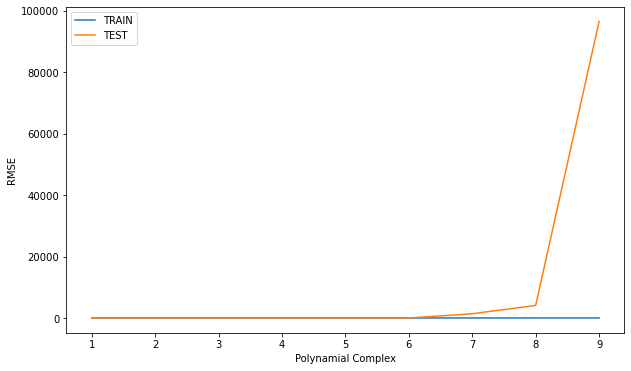

In [55]:
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

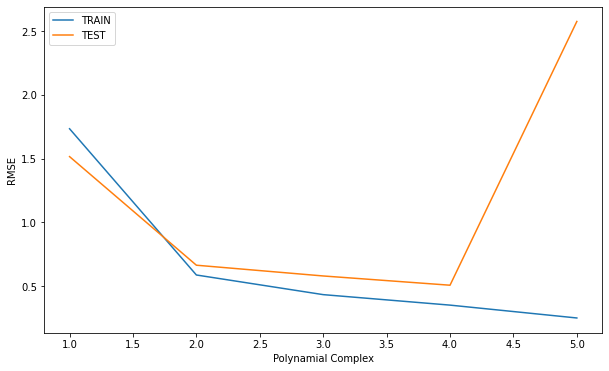

In [56]:
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

## Overfitting

In [57]:
over_poly_converter = PolynomialFeatures(degree =5, include_bias =False)

In [58]:
over_model = LinearRegression()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [60]:
over_model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred_over = over_model.predict(X_test)

In [62]:
eval_metric(y_test, y_pred_over)

r2_score: 0.7649917861532016 
 mae: 0.6659630982027586 
 mse 6.634790408557856 
 rmse 2.5758086902093207


In [63]:
y_train_over = over_model.predict(X_train)

In [64]:
eval_metric(y_train, y_train_over)

r2_score: 0.9976072484358568 
 mae: 0.18621009641287278 
 mse 0.06296802128264421 
 rmse 0.2509342967444749


## Cross Validation for final model

In [65]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [66]:
final_model = LinearRegression()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(final_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [68]:
final_model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred_final = final_model.predict(X_test)

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
model_poly = LinearRegression()
scores = cross_val_score(estimator = model_poly, X = X_train, y = y_train, cv = 10, scoring = "r2")

In [72]:
scores

array([0.99320218, 0.99239726, 0.98790505, 0.97646539, 0.99404816,
       0.95559408, 0.9932446 , 0.99608104, 0.96541804, 0.99386084])

In [73]:
scores.mean()

0.9848216638530936

In [74]:
model_poly = LinearRegression()
scores = cross_val_score(estimator = model_poly, X = X_train, y = y_train, cv = 10, scoring = "neg_mean_absolute_error")

In [75]:
-scores

array([0.31616729, 0.41252836, 0.37940675, 0.49736123, 0.27099016,
       0.53266228, 0.24700441, 0.31127691, 0.4803783 , 0.28053726])

In [76]:
-scores.mean()

0.3728312954095686

In [77]:
model_poly = LinearRegression()
scores = cross_val_score(estimator = model_poly, X = X_train, y = y_train, cv = 10, scoring = "neg_root_mean_squared_error")

In [78]:
-scores

array([0.40777696, 0.52246339, 0.48015642, 0.77004314, 0.3355874 ,
       1.18311765, 0.37079169, 0.36310277, 0.72818202, 0.35064413])

In [79]:
-scores.mean()

0.5511865571391019

In [80]:
# from sklearn.metrics import SCORERS
#list(SCORERS.keys())

In [81]:
scoring = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"]

for i in scoring:
    model_poly = LinearRegression()
    score = cross_val_score(estimator=model_poly, X=X_train, y=y_train, scoring = i, cv=10)
    if i != "r2":
        a = -1
    else:
        a = 1
    print([round(i,4) * a for i in score], "\n")
    print(f"{i} : {score.mean() * a:.4f} \n")

[0.9932, 0.9924, 0.9879, 0.9765, 0.994, 0.9556, 0.9932, 0.9961, 0.9654, 0.9939] 

r2 : 0.9848 

[0.3162, 0.4125, 0.3794, 0.4974, 0.271, 0.5327, 0.247, 0.3113, 0.4804, 0.2805] 

neg_mean_absolute_error : 0.3728 

[0.1663, 0.273, 0.2306, 0.593, 0.1126, 1.3998, 0.1375, 0.1318, 0.5302, 0.123] 

neg_mean_squared_error : 0.3698 

[0.4078, 0.5225, 0.4802, 0.77, 0.3356, 1.1831, 0.3708, 0.3631, 0.7282, 0.3506] 

neg_root_mean_squared_error : 0.5512 



In [82]:
y_train_final = final_model.predict(X_train)

In [83]:
eval_metric(y_train, y_train_final)

r2_score: 0.9928447338242365 
 mae: 0.2910969680651906 
 mse 0.1882990944777783 
 rmse 0.4339344356902069


## final evaluation

In [84]:
eval_metric(y_test, y_pred_final)

r2_score: 0.9880710036579008 
 mae: 0.4127516085422706 
 mse 0.3367813797601001 
 rmse 0.5803286825240505


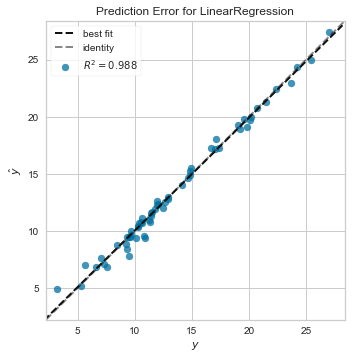

In [85]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

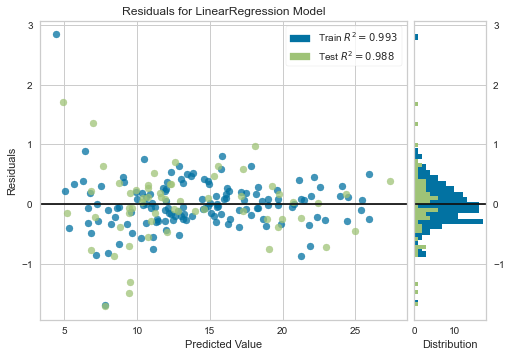

In [86]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof();        # Finalize and render the figure

## Finalizing Model Choice

In [87]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [88]:
final_model = LinearRegression()

In [89]:
final_model.fit(final_poly_converter.fit_transform(X), y)

LinearRegression()

### Saving Model and Converter

In [90]:
from joblib import dump, load

In [91]:
dump(final_model, "poly_model")

['poly_model']

In [92]:
dump(final_poly_converter, "poly_converter")

['poly_converter']

## Predictions

In [93]:
loaded_poly = load("poly_converter")

In [94]:
loaded_model = load("poly_model")

In [95]:
new_record = np.array([149, 122, 12]).reshape(1, -1) # we can use [[149, 122, 12]]

In [96]:
new_record_poly = loaded_poly.fit_transform(new_record)

In [97]:
new_record_poly

array([[1.490000e+02, 1.220000e+02, 1.200000e+01, 2.220100e+04,
        1.817800e+04, 1.788000e+03, 1.488400e+04, 1.464000e+03,
        1.440000e+02, 3.307949e+06, 2.708522e+06, 2.664120e+05,
        2.217716e+06, 2.181360e+05, 2.145600e+04, 1.815848e+06,
        1.786080e+05, 1.756800e+04, 1.728000e+03]])

In [98]:
loaded_model.predict(new_record_poly)

array([38.20824906])